### 1. Data Description 📝
(emoji added for flare this is not AI I swear)

The `players.csv` dataset provides information on players of the Minecraft server:
- There are 196 observations and 7 variables in the dataset.
-  `experience` represents the experience level of the player from one of five options: Amateur, Beginner, Pro, Regular, and Veteran.
- `subscribe` represents whether the user has subscribed to a game-related newsletter, a logical value of `TRUE` or `FALSE`.
- `hashedEmail` represents the email associated with the user account, hashed to maintain anonymity.
- `played_hours` represents the total number of hours the user has spent playing in the server. The average number of hours in this dataset is 5.85 hours.
- `name` represents the user's name.
- `gender` represents the user's gender identity. User can select from Male, Female, Prefer not to say, or input their own answer (e.g. Non-binary, Two-spirited, etc.)
- `Age` represents the user's age. The average age in this dataset is 21.14 years old.

The `sessions.csv` dataset provides a record of players' activity (in the form of sessions) in the server:
- There are 1535 observations and 5 variables in the dataset.
- `hashedEmail` represents the email associated with the user, hashed to maintain anonymity.
- `start_time` represents the date and time when the session started, i.e. the player came online.
- `end_time` represents the date and time when the session ended, i.e. the player went offline.
- `original_start_time` (presumably) represents the original format that the start time was recorded in, before being transformed to `start_time`.
- `original_end_time` represents the original format that the end time was recorded in, before being transformed to `end_time`.



### 2. Questions☝️

In this project, I will address this broad question: **Which "kinds" of players are most likely to contribute a large amount of data?**

Specifically, my question is: **Can a user's age and experience predict their gaming frequency, as determined by the number of sessions?**

### 3. Exploratory Data Analysis and Visualization ⌨️
See below for all code pertaining to this question! A couple notes:
- I believe that the data is mostly tidy (especially in terms of how the variables are organized), so minimal wrangling was carried out outside of some renaming and data type changing.
- There are only two quantitative variables to average: the mean number of playing hours `mean_hours = 5.85` (hours) and mean age of users `mean_age = 21.14` (years).
- The visualization is meant to address the question of how age and experience predict gaming frequency by plotting session count (on the y-axis) against age (on the x-axis), stratified by experience level. The main insight I gained from this visualization is that the majority of users of any level is 16-25 years old, and only have 0-1 sessions recorded in the data. I actually applied a logarithmic scale to help see the data points a bit clearer, as otherwise the few outliers on top make the plot to "bottom-heavy" and hard to read.

### 4. Methods and Plan 

In [57]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(RColorBrewer)

In [49]:
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [50]:
# converting the columns 'experience' and 'gender' in players.csv to factors
players <- players |> mutate(across(c("experience", "gender"), as.factor))

# rename certain columns so that all follow the same convention
players <- players |> rename(age = Age) |> rename(hashed_email = hashedEmail)
sessions <- sessions |> rename(hashed_email = hashedEmail)

In [51]:
# reporting the means for quantitative variables in players.csv,
# which includes 'played_hours' and 'age'

mean_hours <- mean(players$played_hours, na.rm = TRUE)
mean_age <- mean(players$age, na.rm = TRUE)

mean_tbl <- tibble(
    mean_hours = mean_hours,
    mean_age = mean_age
)

mean_tbl

mean_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


In [52]:
# getting the number of sessions each player has, appending to players.csv as
# a new column

sess_count <- sessions |> 
    group_by(hashed_email) |>
    summarize(sess_count = n())

players <- players |>
    left_join(sess_count, by = "hashed_email") |> 
    mutate(sess_count = replace_na(sess_count, 0))

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


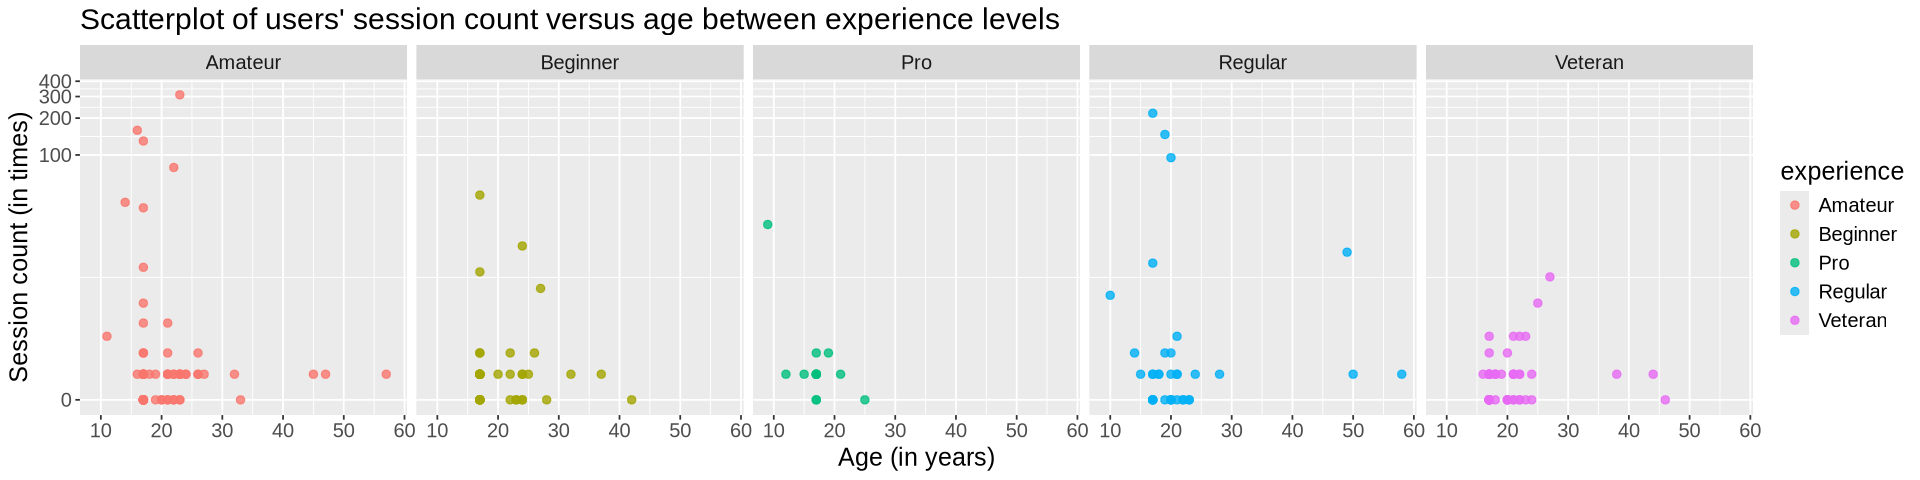

In [89]:
# scatterplot of users' session count by age and experience level
options(repr.plot.width=16, repr.plot.height=4)
age_plot <- players |>
    ggplot(aes(x = age, y = sess_count, color = experience)) +
    geom_point(alpha = 0.8, size = 2) +
    labs(title = "Scatterplot of users' session count versus age between experience levels",
         x = "Age (in years)",
         y = "Session count (in times)") +
    scale_y_continuous(trans = pseudo_log_trans(base = 10)) +
    scale_fill_brewer(palette = 'Spectral') +
    facet_wrap(~ experience, nrow = 1) +
    theme(text = element_text(size = 15))

age_plot